In [1]:
from hossam import load_data
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb
import numpy as np

In [15]:
my_dpi = 200
font_path = "./NotoSansKR-Regular.ttf"
fm.fontManager.addfont(font_path)
font_prop = fm.FontProperties(fname=font_path)
font_name = font_prop.get_name()
my_font_name = "Noto Sans KR"
my_theme = "dark"

sb.set_theme(style=my_theme)
plt.rcParams['font.family'] = my_font_name
plt.rcParams['font.size'] = 5
plt.rcParams['axes.unicode_minus'] = False

In [3]:
origin = load_data('penguins')
origin

[data] https://data.hossam.kr/data/lab06/penguins.xlsx
[desc] 남극 팔머 군도의 펭귄 3종에 대해 신체 치수와 서식지 정보(출처: seaborn 내장 데이터)

field              description
-----------------  -------------
species            팽귄 종
island             서식지
bill_length_mm     부리 길이
bill_depth_mm      부리 두께
flipper_length_mm  날개 길이
body_mass_g        몸무게
sex                성별



,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,MALE
1,Adelie,Torgersen,39.5,17.4,186,3800,FEMALE
2,Adelie,Torgersen,40.3,18.0,195,3250,FEMALE
3,Adelie,Torgersen,36.7,19.3,193,3450,FEMALE
4,Adelie,Torgersen,39.3,20.6,190,3650,MALE
...,...,...,...,...,...,...,...
329,Gentoo,Biscoe,47.2,13.7,214,4925,FEMALE
330,Gentoo,Biscoe,46.8,14.3,215,4850,FEMALE
331,Gentoo,Biscoe,50.4,15.7,222,5750,MALE
332,Gentoo,Biscoe,45.2,14.8,212,5200,FEMALE


명목형 변수에 대한 전처리 진행

In [4]:
df = origin.astype({"species":'category', "island":'category',
                    "sex":'category'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            334 non-null    category
 1   island             334 non-null    category
 2   bill_length_mm     334 non-null    float64 
 3   bill_depth_mm      334 non-null    float64 
 4   flipper_length_mm  334 non-null    int64   
 5   body_mass_g        334 non-null    int64   
 6   sex                333 non-null    category
dtypes: category(3), float64(2), int64(2)
memory usage: 11.9 KB


RegPlot
- ScatterPlot에 단일 회귀선을 자동으로 추가
- 회귀선 주변의 신뢰구간도 함께 표시
- 두 변수 사이의 선형적 관계가 어느 정도인지 직관적으로 해석 가능
- 단일 그래프에서만 사용하며(hue 파라미터 지원 안함), 세부 커스터마이징이 쉬움

**언제쓰나?**

->"상관이 있나?" 뿐 아니라 어느정도 기울기인가? 도 보고싶을때

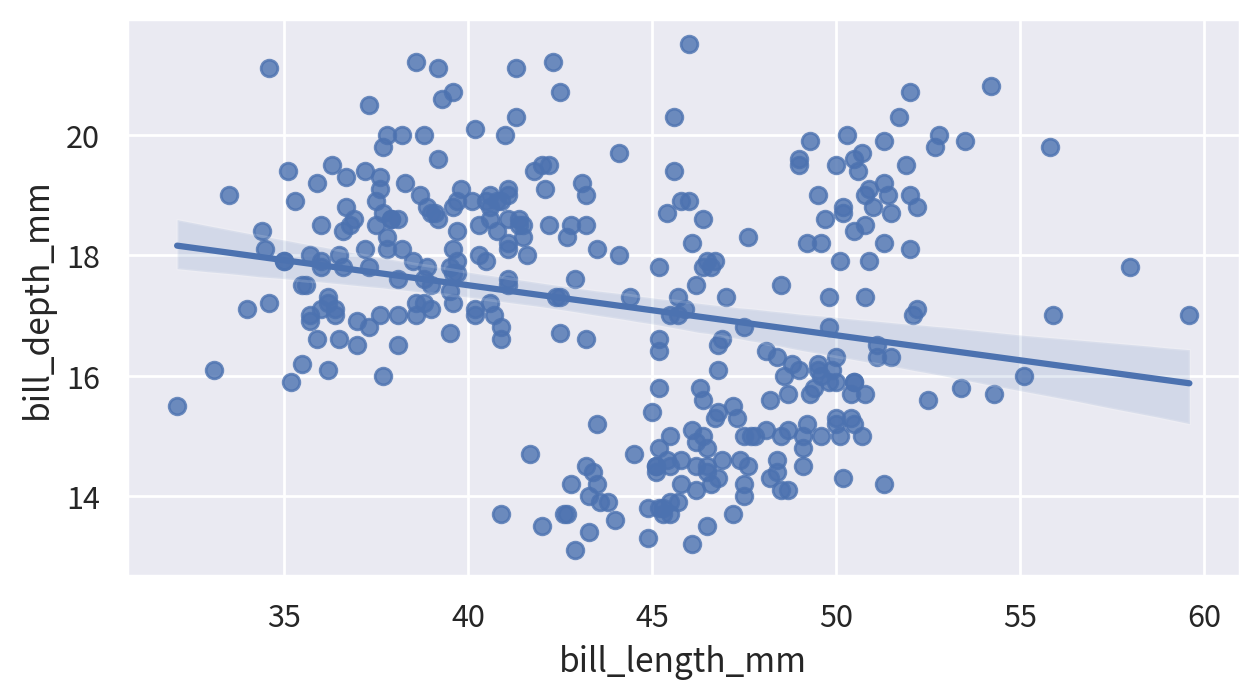

In [5]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1280             #그래프 가로 크기
height_px = 720             #그래프 세로 크기
rows = 1                    #도화지의 행 수
cols = 1                    #도화지의 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 2) 그래프 그리기 -> seaborn 사용
sb.regplot(data=origin, x='bill_length_mm', y='bill_depth_mm')

# 3) 그래프 꾸미기 -> 도화지(ax)에 직접 적용
ax.grid(True)

# 4) 출력
plt.tight_layout()                      #여백 제거
# plt.savefig("myplot.png", dpi=my_dpi)   #생략 가능
plt.show()                              #그래프 화면 출력
plt.close()                             #그래프 작업 종료

LmPlot
- RegPlot의 기능을 확장한 형태(scatterplot과 regplot의 결합)
- 여러 범주를 기준으로 행,열로 나눠(facet) 비교 가능
- 색(hue), 행(row), 열(col) 옵션을 통해 그룹 간 관계 차이를 시각화
- 관계 패턴을 다양한 하위집단으로 세분해 비교할 때 유용

**언제쓰나?**
- 성별/지역/연도 등 그룹별로 회귀선을 비교하고 싶을 때

### 1. 기본 사용 방법
- 산점도 그래프에 추세선을 추가함
- 기본 파라미터는 regplot() 메서드와 동일
- hue 파라미터를 지원한다는 점에서 regplot과 차이를 보임

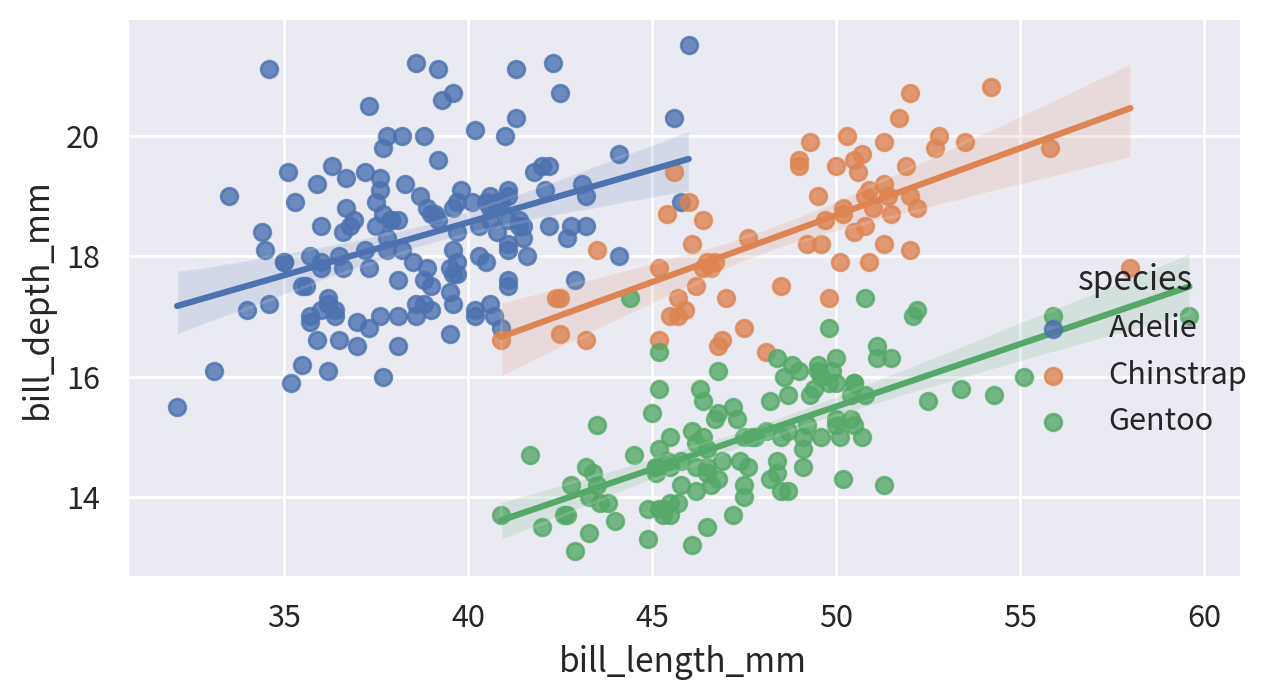

In [6]:
width_px = 1280
height_px = 720
figsize = (width_px / my_dpi, height_px / my_dpi)

g = sb.lmplot(data=df, x='bill_length_mm', y='bill_depth_mm', hue="species")
g.fig.set_dpi(my_dpi)
g.fig.set_figwidth(figsize[0])
g.fig.set_figheight(figsize[1])
plt.grid()

plt.tight_layout()
plt.show()
plt.close()

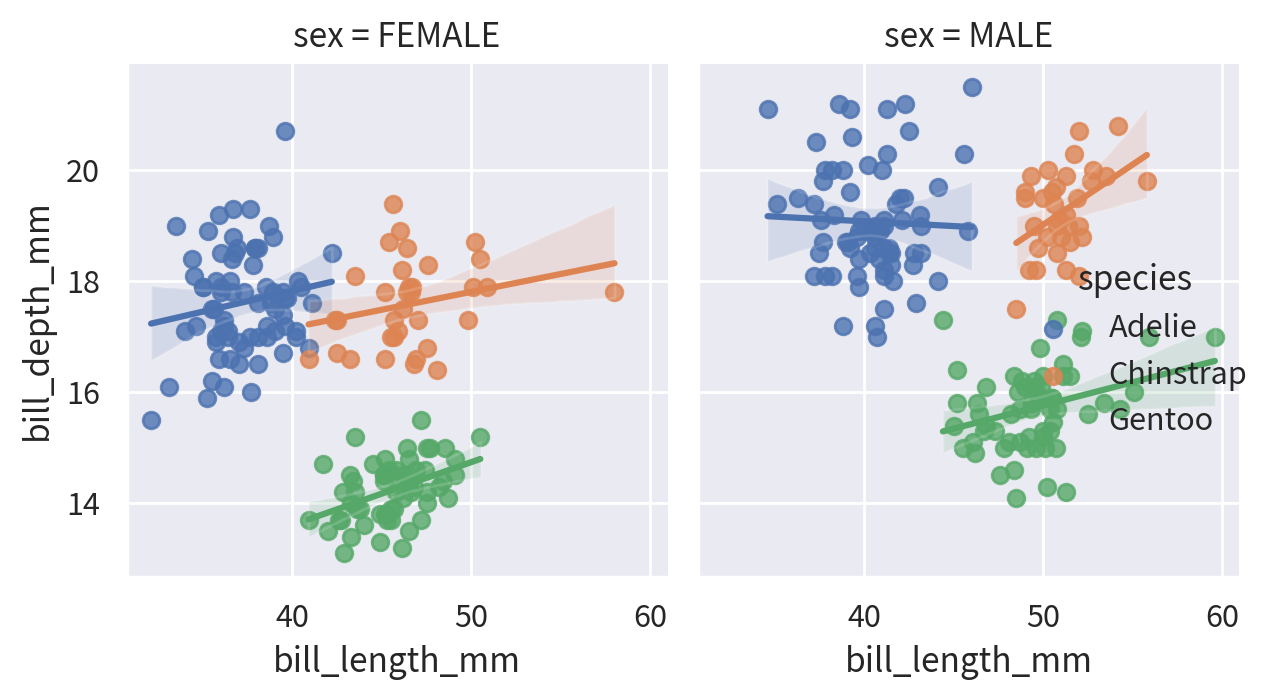

In [7]:
width_px = 1280
height_px = 720
figsize = (width_px / my_dpi, height_px / my_dpi)

g = sb.lmplot(data=df, x='bill_length_mm', y='bill_depth_mm', hue="species", col='sex')
g.fig.set_dpi(my_dpi)
g.fig.set_figwidth(figsize[0])
g.fig.set_figheight(figsize[1])

for ax in g.axes.flatten():
    ax.grid(True)

# plt.grid()

plt.tight_layout()
plt.show()
plt.close()

모든 조건에 따라 행,열로 분할
- row, col 파라미터를 사용한다.

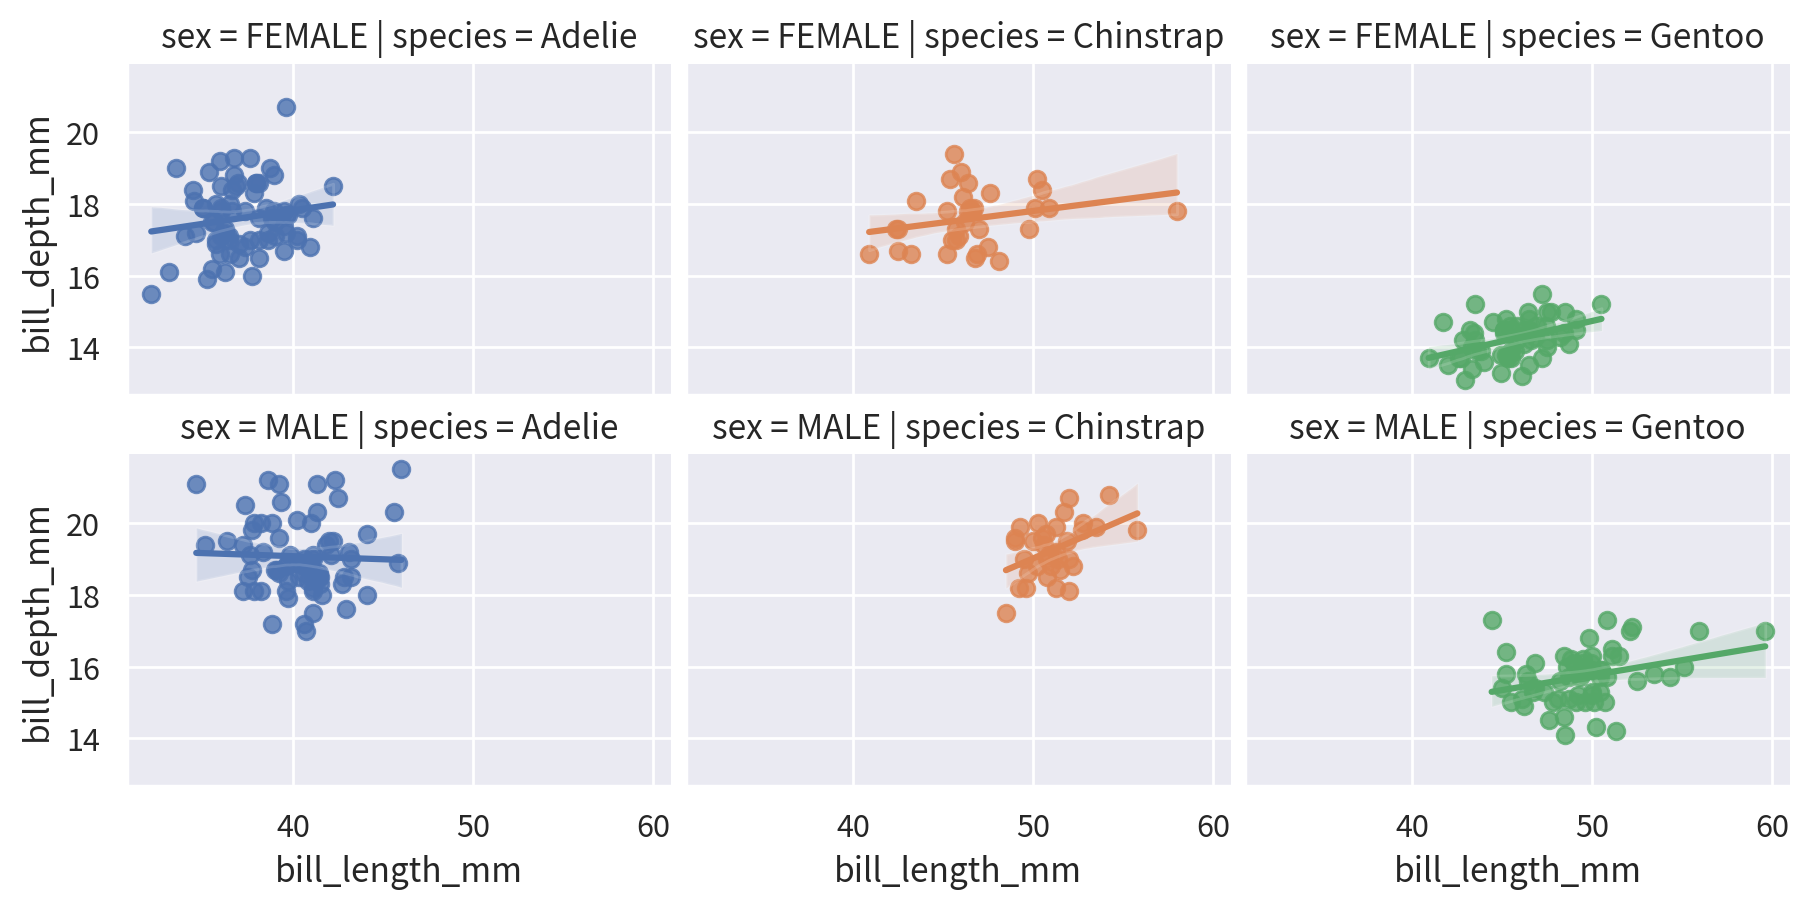

In [16]:
width_px = 1800
height_px = 900
figsize = (width_px / my_dpi, height_px / my_dpi)

g = sb.lmplot(data=df, x='bill_length_mm', y='bill_depth_mm', hue="species", col="species", row='sex')
g.fig.set_dpi(my_dpi)
g.fig.set_figwidth(figsize[0])
g.fig.set_figheight(figsize[1])

for ax in g.axes.flatten():
    ax.grid(True)

plt.tight_layout()
plt.show()
plt.close()

PairPlot (산점도 행렬)
- 모든 변수에 대한 교차 분석
- 전체 데이터의 구조와 변수 간 상관 관계를 한 눈에 파악 가능
- 대각선 도표는 데이터의 주변 분포를 표시하기 위한 일변량 분포 도표(커널 밀도 곡선)이나 히스토그램이 그려진다.
- 탐색적 데이터 분석(EDA)에서 초기 전반 스캔용으로 매우 유용
- 다소 처리가 느리다.

**언제 씀?**
- 전체 변수들이 서로 어떤 관계를 갖는 지 한번에 파악할 때

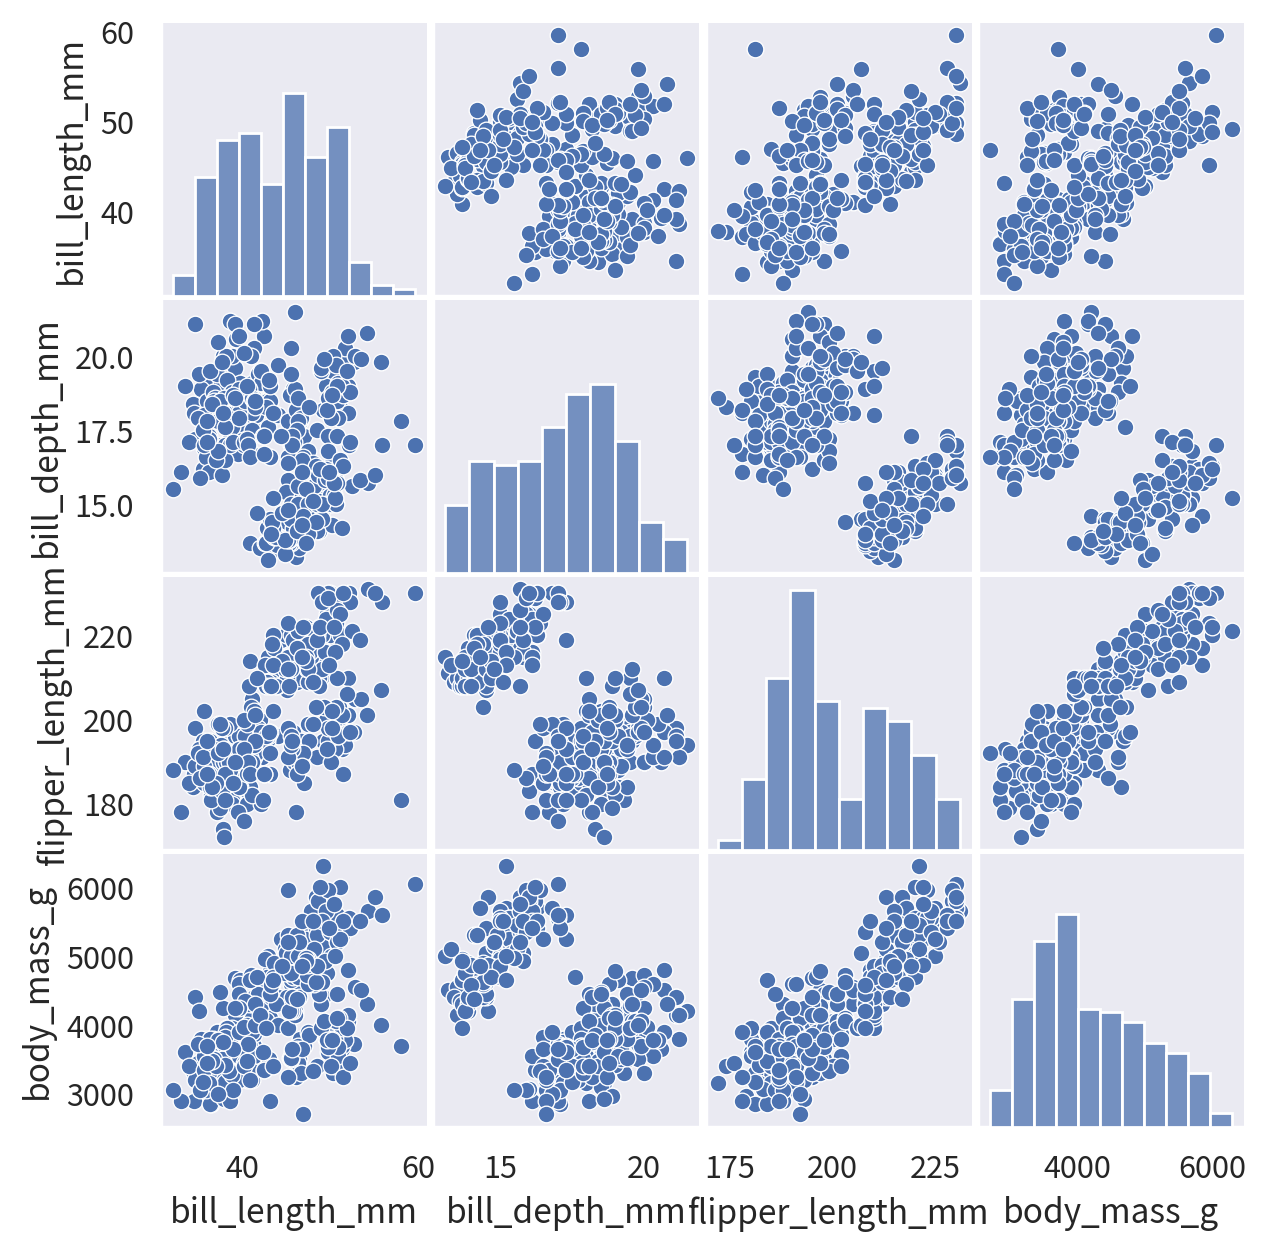

In [18]:
width_px = 1200
height_px = 1200
figsize = (width_px / my_dpi, height_px / my_dpi)

g = sb.pairplot(df)
g.fig.set_dpi(my_dpi)
g.fig.set_figwidth(figsize[0])
g.fig.set_figheight(figsize[1])
plt.grid()

# plt.tight_layout()
plt.show()
plt.close()

hue 파라미터 적용
- hue 파라미터에 변수를 할당하면 hue의미론적 매핑이 추가되고 기본 주편 플롯이 계층화된 커널 밀도 추정(KDE)으로 변경된다.

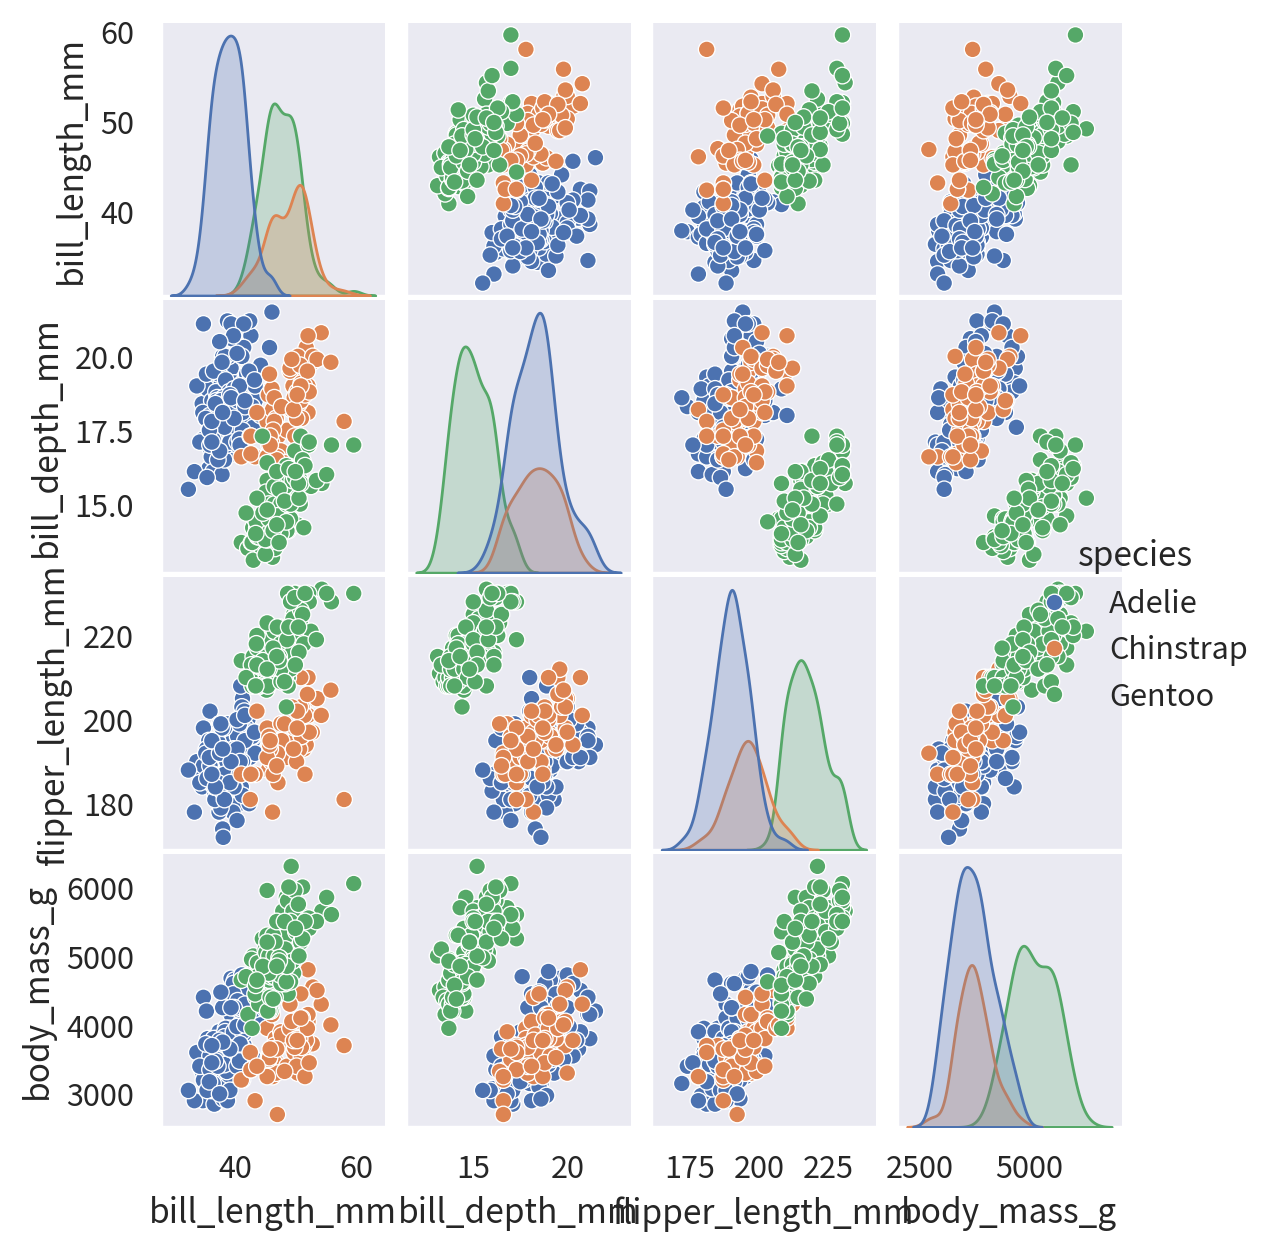

In [19]:
width_px = 1200
height_px = 1200
figsize = (width_px / my_dpi, height_px / my_dpi)

g = sb.pairplot(df, hue='species', diag_kind='kde')
g.fig.set_dpi(my_dpi)
g.fig.set_figwidth(figsize[0])
g.fig.set_figheight(figsize[1])
plt.grid()

# plt.tight_layout()
plt.show()
plt.close()

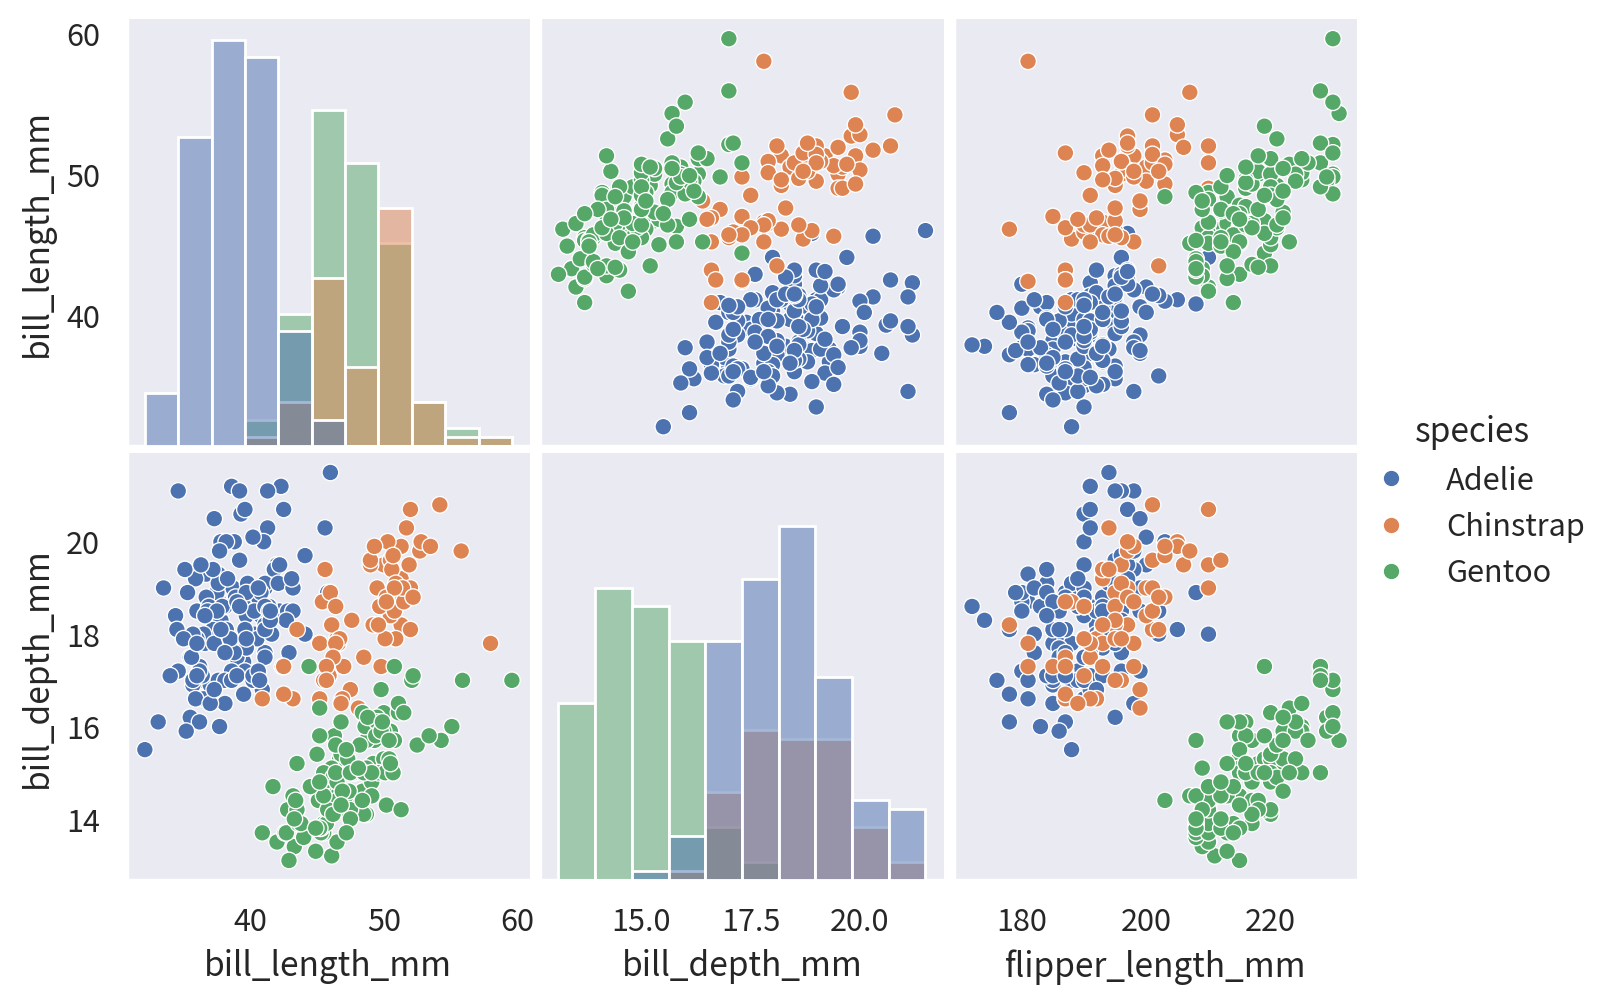

In [20]:
width_px = 1600
height_px = 1000
figsize = (width_px / my_dpi, height_px / my_dpi)

g = sb.pairplot(df, hue='species',diag_kind='hist',
                x_vars=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm'],
                y_vars=['bill_length_mm', 'bill_depth_mm',])
g.fig.set_dpi(my_dpi)
g.fig.set_figwidth(figsize[0])
g.fig.set_figheight(figsize[1])
plt.grid()

# plt.tight_layout()
plt.show()
plt.close()

데이터를 그룹별로 묶어서 표시하기
- pairplot() 메서드가 리턴하는 객체를 받아서 map_lower()메서드를 호출한다.
- map_lower() 메서드에 다른 종류의 함수 이름을 적용하면 대각선 기준으로 서로 다른 종류의 시각화 결과물을 표시할 수 있다.

AttributeError: 'Figure' object has no attribute 'rotate_labels'

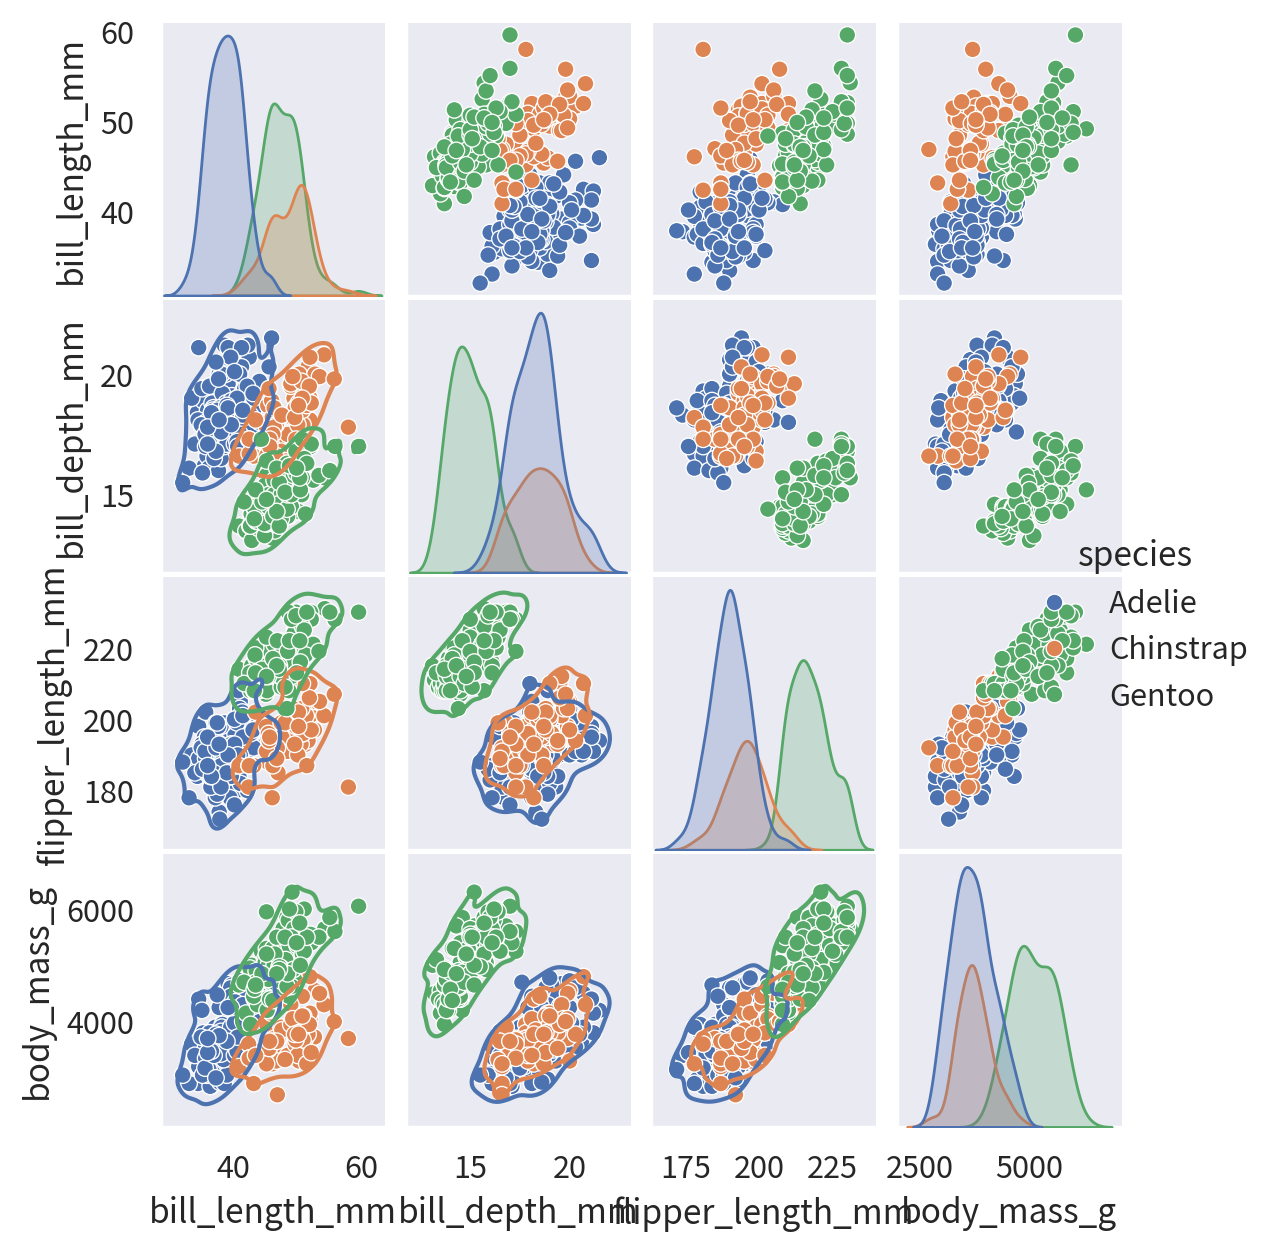

In [ ]:
width_px = 1200
height_px = 1200
figsize = (width_px / my_dpi, height_px / my_dpi)

g = sb.pairplot(df, hue='species')
g.map_lower(sb.kdeplot, levels=1, color = 0.2)
g.fig.set_dpi(my_dpi)
g.fig.set_figwidth(figsize[0])
g.fig.set_figheight(figsize[1])

plt.grid()

# plt.tight_layout()
plt.show()
plt.close()